<a id='start'></a>
#  Statistical inference of high-order interactions in binary data through Minimally Complex (spin) Models
### Tutorial

This is a tutorial for the MinCompSpinPackage which is an R package for the original C++ program MinCompSpin (https://github.com/clelidm/MinCompSpin) whose implementation was based on the paper: Statistical Inference of Minimally Complex Models (2021) by Clélia de Mulatier, Paolo P. Mazza, and Matteo Marsili. In arXiv: 2008.00520 [cs.AI].

This notebook contains a showcase of the package's functionality with some additional visualizations and explanations of it. Some parts of the explanation are originally from MinCompSpin's GitHub.

Below in the index you can find the overview of this tutorial. Section 2's sub-sections are in order of how the functions should be for detecting community structures.


## Index

- [0. Installing the package](#install)
     - [0.1. Linux/ Mac systems](#unix)
     - [0.2. Windows systems](#windows)

- [0. Loading the package](#load)

- [1. Theoretic Introduction](#intro)

- [2. Detecting Communities](#use)
     - [2.1 Setting the required variables](#set)
     - [2.2. Read data](#read_datafile)
     - [2.3. Choose a Basis](#basis)
     - [2.4. Build Kset according to basis](#kset)
     - [2.5. Analyzing all independent and sub-complete models](#print)
     - [2.6. Finding the best MCM](#mcm_search)
         - [2.6.1 Finding the best MCM (after running 2.1 - 2.5)](#mcm_search_dependent)
         - [2.6.2 Finding the best MCM (all previous steps combined in one function call)](#mcm_search_aao)
- [3. Analyis of the Big5 Personality test | a statistical analysis with the package](#sa_start)
     - [3.1  Analysis results on a subset of the Big5 data-set](#sa_set)     
     - [3.2 Inspecting the Log-Evidence](#inspect_loge)
***

<a id='install'></a>
## 0. Installing the package

Disregard this section if you have already succesfully installed the package. To check for succesfull installation try loading the library in the [next section](#load)!


<a id='unix'></a>
### LINUX/MAC SYSTEMS:

**1 | Install from a tar file (downloaded from the github repo):**

- Download the package tar from github.
- Installing the package can be done in 2 ways:

  1. Through the Terminal:
      > Open the Terminal in the directory the tar file is in and enter:
        ```R
        R CMD INSTALL MinCompSpinPackage_1.0.tar.gz
        ```
        In the script you can now load the package.

  2. In R prompt or R script:
    
      > Use the following commands to install:
        ```R
        path_to_file = file.path(getwd(), "MinCompSpinPackage_1.0.tar.gz")
        install.packages(path_to_file, repos = NULL, type="source")
        ```
***
<a id='windows'></a>
### WINDOWS SYSTEMS
  1. As https://stat.ethz.ch/pipermail/r-help/2008-August/169599.html states:

      > If you have the Rtools on Windows (available from
        http://www.murdoch-sutherland.com/Rtools, get the installer
        Rtools28.exe), then you can install it in Windows using:
        
        ```R
        install.packages("foo.tar.gz", repos=NULL, type="source")
        ```
      > or from a command line using:
        
        ```R
        Rcmd INSTALL foo.tar.gz
        ```
***

<a id='load'></a>
## 0. Load the package  

Before the package can be loaded, it first needs to be installed. Follow the instructions in [section 0](#install) for more information.

If succefully loaded you should see no output.

In [1]:
library(MinCompSpinPackage)

***
<a id='intro'></a>
## 1.Theoretic introduction

This section will contain a short introduction to the theory behind the program to gain an understanding of the package and its available functions.

The search for community structures in binary data is based on finding the best model that describes the data. A model in this context refers to Minimally Complex (spin) Models (MCMs).


### What is an MCM and how can it describe a community?
The search for community structures starts by representing the data as spin models that can have interactions of every  order i.e. pairwise, three body, four body etc. More  explicitly, the  variables of the binary data points are partitioned and along with the interactions within those partitions, they describe a spin model.


An MCM stands for Minimally Complex (spin) Model and is a subset of spin models. 
The main difference between MCMs and spin models is in the assumed interactions between and within partitions of variables. Each MCM corresponds to a partitioning of binary spin variables which have no interactions at all between the parts, and all interactions of every order within each part. For instance, if for every data point of a binary data set $( \hat{s} = {s^{(1)}, ..., s^{(N)}})$ there are 10 binary spin variables $(s_{0},..., s_{9} )$, those 10 variables can be partitioned into 5 variables, 3 variables and 2 variables. Within those partitions all interactions are assumed: so the 5 variable community would contain 5 single body interactions, ${5 \choose 2}$ pairwise interactions,  ${5 \choose 3}$  three body interactions, 5 four body interactions and one five body interaction. But between partitions there are no interactions. This is unlike spin models that also allow for interactions between the parts. 

An example of 3 MCMs are shown below:

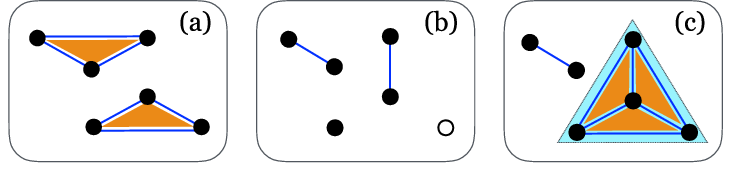

In this example each model contains 6 variables which are partitioned into communities. The black dots represent single body interactions, the blue lines represent pair-wise interactions, the orange triangle represents three-body interactions and finally the blue triangle represents four-body interactions.

MCM (a) defines 2 communities of 3 variables each. MCM (b) defines 2 communities containing two variables and 1 community containing one. MCM (c) defines 2 communities, 1 containing two variables and 1 containing 5.

#### How does an MCM correspond to community structures of a binary data-set
An MCM consists of partitions of variables in which the partitions have no interactions with each other meaning that every spin variable can only exist in one partition. 
So if a data-set consists of data-points that contain the variables $s_{0}, s_{1}, s_{2}, s_{3}, s_{4}, s_{5}, s_{6}, s_{7}, s_{8}, s_{9}$, an example of an MCM in which the variables are all in one community is:

        MCM = {"111111111"}

This MCM contains 1 partition and the partition is defined as "111111111". It is a binary string of the same size as a data-point of the data-set. The string represents the variables in the same order as the spin variables are represented in the data. But its value indicates whether it is part of the partition or not. Therefore since are all part of the same community, all values of the partition are set to 1. 

| $s_{0} $ | $s_{1}$ | $s_{2}$ | $s_{3} $| $s_{4}$ | $s_{5}$ | $s_{6}$ | $s_{7}$ | $s_{8}$ | $s_{9}$ |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |


Example 2:
This is an MCM consisting of the 3 partitions {$s_{0}, s_{2}, s_{6}, s_{8}$}, {$s_{1}, s_{7}, s_{9}$} and {$s_{3}, s_{4}, s_{5} $}

         MCM = {"10100010100", "01000001010", "00011100000"}

         
| $s_{0} $ | $s_{1}$ | $s_{2}$ | $s_{3} $| $s_{4}$ | $s_{5}$ | $s_{6}$ | $s_{7}$ | $s_{8}$ | $s_{9}$ |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| 1 | 0 | 1 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 |


         

#### Define MCMs with MinCompSpinPackage

In the program an MCM is defined in the same way but internally the partitions are in integer representation.

Displayed below is an example of how to define an MCM for the Shapes data-set that contains 9 binary spin variables manually and from a file. The file from which the MCM's partitions are read should contain one partition per row.

The output is a list of two vectors in which the first vector contains the spin variable and the second contains the integer representation of the binary partitions.



In [9]:
input_data <- "data/Shapes/Dataset_Shapes_n9_MCM_Binary.dat"

n <- 9 # binary (spin) variables

# An MCM is described by which partitioning of variables in contains in integer representation.
part_01 <- strtoi("110000000", base = 2) # = 384
part_02 <- strtoi("001000000", base = 2) # = 64
part_03 <- strtoi("000100000", base = 2) # = 32
part_04 <- strtoi("000010000", base = 2) # = 16
part_05 <- strtoi("000001000", base = 2) # = 8
part_06 <- strtoi("000000100", base = 2) # = 4
part_07 <- strtoi("000000010", base = 2) # = 2
part_08 <- strtoi("000000001", base = 2) # = 1

# MCM_Choice0 <- c(384, 64, 32, 16, 8, 4, 2, 1) # The same as MCM_Choice0!
MCM_Choice <- c(part_01, part_02, part_03, part_04, part_05, part_06, part_07, part_08)

print("--------------------------------------", quote=FALSE)
print('MCM Choice')
# str(MCM_Choice0)
str(MCM_Choice)
print("--------------------------------------", quote=FALSE)
print('Defining MCM from MCM_Choice:')
MCM_manual <- Create_MCM(MCM_Choice)
str(MCM_manual)
print("--------------------------------------", quote=FALSE)
print('Read MCM from file containing the same binary string with which MCM_Choice was created:')
MCM_file <- Read_MCMParts_BinaryRepresentation(input_data, n);
str(MCM_file)
print("--------------------------------------", quote=FALSE)

[1] --------------------------------------
[1] "MCM Choice"
 int [1:8] 384 64 32 16 8 4 2 1
[1] --------------------------------------
[1] "Defining MCM from MCM_Choice:"
List of 2
 $ : num [1:8] 0 1 2 3 4 5 6 7
 $ : num [1:8] 384 64 32 16 8 4 2 1
[1] --------------------------------------
[1] "Read MCM from file containing the same binary string with which MCM_Choice was created:"
List of 2
 $ : num [1:8] 0 1 2 3 4 5 6 7
 $ : num [1:8] 384 64 32 16 8 4 2 1
[1] --------------------------------------


It is possible to check that the self defined model properly defines an MCM by calling the function below.

In [10]:
N <- 0L
Nset <- read_datafile(N, n, input_data) # Reads the input data-file

if(check_partition(MCM_manual, n)) # Checks whether the provided MCM correctly defines one for the data-set.
{
  PrintTerminal_MCM_Info(Nset, N, n, MCM_manual);
} else {
  print("The set of 'parts' provided does not form a partition of the basis elements.")
}



--->> Read "data/Shapes/Dataset_Shapes_n9_MCM_Binary.dat",	 Build Nset...		 data size N = 8
********** General Information about the MCM: **********
Best MCM has 8 partitions and the following properties:
	 LogL = -24.1133
 	 C_param = 1.20782 	 	 C_geom = 10.3026
 	 Total complexity = 11.5104
 	 MDL = -35.6237
  	 LogE = -38.028

********** Information about each part of the MCM: **********
	 (the total LogE of the model is the sum of the values for each part)
	 !! The first operator of the basis provided corresponds to the bit the most on the right !!
	 !! The last operator corresponds to the bit the most on the left !!

## 1:Part_int 	 2:Part_binary 	 3:LogL 	 4:C_param 	 5:C_geom 	 6:C_tot 	 7:LogE
 	 384 	 110000000 	-3.01416 	0.362347 	 2.28946 	2.65181 	-7.67771
 	 64 	 001000000 	-3.01416 	0.120782 	 1.14473 	1.26551 	-4.33575
 	 32 	 000100000 	-3.01416 	0.120782 	 1.14473 	1.26551 	-4.33575
 	 16 	 000010000 	-3.01416 	0.120782 	 1.14473 	1.26551 	-4.33575
 	 8 	 000001000 	

### How are communities detected ?

<!-- Explain here how it happens, what parameters are used to determine the best Mddel, explain about Bayesian model selection... etc. -->

Community structures within a binary data-set are found by finding the most appropriate MCM defining the data-set. Determining the most appropriate choice is achieved through Bayesian Model Selection. Thus, when looking for a model the Log-likelihood (LogL), Log-evidence (LogE) and complexity (C_tot = C_param + C_geom) of the model are all taken into account.  The model with the highest Log-evidence is the most appropriate model.


Before an exhaustive search for the best MCM is done, the search of MCMs is first cut down. This is done by finding the best model among all Independent Models (IMs), which are models composed of independent variables. These are models in which every variable is in its own community. The maximization of the evidence over all IMs is done by choosing the basis b (set of independent operators that can generate all operators of the model) of the n most biased independent operators in the data set. 
 
Then the search is restricted to the subset of models that have b as a preferred basis. And with this, the algorithm becomes feasible for data sets with at most 15 spin variables.

#### Printing Information regarding MCMs 

Below are three supplementary functions to print some information about an MCM.

##### Log-Likelihood (LogL)

In [11]:
LogL_MCM(Nset, MCM_file, N, n)

[1] -24.11329

##### Log-Evidence (LogE)

In [12]:
LogE_MCM(Nset, MCM_file, N, n)

[1] -38.02796

##### Complexity

An MCM's Complexity is a summation of two terms. Geometric and Parametric complexity. For Parametric complexity, the more interactions in an MCM, the larger the term will be. Geometric complexity says something about how complex the model is depending on the chosen parameters. 


In [13]:
C_param <- 0
C_geom <- 0

print("Total Complexity: ")
Complexity_MCM(MCM_file, N, n, C_param, C_geom)

print(paste0("Parametric Complexity: ", C_param))
print(paste0("Geometric Complexity: ", C_geom))

print(paste0("C_param + C_geom: ", C_geom + C_param))

[1] "Total Complexity: "


[1] 11.51039

[1] "Parametric Complexity: 1.20782237635245"
[1] "Geometric Complexity: 10.3025689726446"
[1] "C_param + C_geom: 11.5103913489971"


[Jump to the start](#start)

***

<a id='use'></a>
## 2. Detecting communities with the package

The data-set that will be used in this showcase is that of the US Supreme Court which contains voting data of nine judges on 895 votings ($N$ = 895). The aim is detect communities i.e. grouping of judges using the package.

#### More about the US Supreme Court data-set
Every data-point is a voting and contains nine binary variables corresponding to the vote each of the nine judges casted. The table below shows which binary variables correspond to which judge. The judges are denoted by their initials.

| $N$  | WR | JS | SO | AS | AK | DS | CT | RG | SB |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 3 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 4 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 5 | 1 | 0 | 1 | 1 | 0 | 0 | 1 | 0 | 0 |
| . | . | . | . | . | . | . | . | . | . |
| 894 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 895 | 1 | 1 | 1 | 0 | 1 | 0 | 1 | 0 | 1 |






<a id='set'></a>
### 2.1 Setting the required variables.

Before using the program to detect communities, some variables need to be set and data-file paths need to be defined.

#### The input data-set

The input data-set is the data on which the community detection algorithm should be performed. This binary file should be formatted in such a way that every line must only contain one data-point and they must all be written as binary strings of 0's and 1's encoded on at least $n$ bits (with no spaces between the bits).


<div class="alert alert-block alert-info">
<b>Warning:</b> Be aware that defining the wrong path to the data-file and running the program with it can cause R to crash. Make sure the path is correct. 
</div>




In [14]:
# Set the path to the data-file.
datafile_name <- 'data/US_SupremeCourt/SCOTUS_n9_N895_OldBasis.dat'

#### Number of binary (spin) variables ($n$)

The number of binary (spin) variables ($n$) is equal to the total amount of variables per data-point which, in the case of the US Supreme Court data, is nine.

In [15]:
n <- 9

#### Output directory name

The results of the community detection will be stored in a directory. Here a new sub-directory is created in the current working directory.


In [16]:
# Create output directoy in the working directory if it does not already exist.
print("--->> Create OUTPUT Folder: (if needed) ", quote = FALSE)

curDir <- getwd()
output_dir <- 'OUTPUT_9var_USSCourt'

if(!dir.exists(file.path(curDir, output_dir))) {
  dir.create(file.path(curDir, output_dir))  
} else {
    print("Directory already exists.")
}


[1] --->> Create OUTPUT Folder: (if needed) 
[1] "Directory already exists."


<a id='read_datafile'></a>
### 2.2 Reading the data | Creating Nset

First the data-set needs to be read. The function read_datafile() takes three input parameters:

| Input variable | Description |
| :- | :---------------------: | 
| $N$ | An empty integer variable that will contain the size of the entire data-set after running read_datafile() | 
| $n$ | The amount of binary (spin) variables  | 
| datafile_name | The location and name of the data-set file. | 

read_datafile() then returns a list containing every (binary) state and its frequency of occurrence in the data-set. Thus the function counts how many times the same data-points (which is seen as a state) occur in the entire data-set. The states are saved in integer representation (e.g. "000000001" = 1 and "110000000" = 384).

Although $N$ is not returned, the defined variable does contain the size of the data-set after the function ran its course. In order for the function to be able to adjust the defined variable, $N$ must be explicitly defined as an integer. In R integers are specified by the suffix L (e.g. 1L ).

In [17]:
N <- 0L # This will contain the number of datapoints in the dataset.

Nset <- read_datafile(N, n, datafile_name)

# prints
print("Nset contains:", quote=FALSE)
str(Nset)

# N check 
if (!N > 0) {
    print(paste("N =", N))
    print("N is either numeric and is therefore still empty (read_datafile takes an integer vector) or the data-set is empty. Set N manually based on read_datafile output.")
    
    N <- 895 # N of the US Supreme Court data-set.
    print(paste("N =", N))
}


--->> Read "data/US_SupremeCourt/SCOTUS_n9_N895_OldBasis.dat",	 Build Nset...		 data size N = 895
[1] Nset contains:
List of 2
 $ : int [1:128] 383 511 0 356 36 325 375 308 64 292 ...
 $ : int [1:128] 61 221 174 17 29 1 7 31 1 29 ...


[1] All unique states of the data-set in integer representation:
  [1] 383 511   0 356  36 325 375 308  64 292 472 381   4 403  65 288 438 235
 [19] 372 328  52 382 260  76 300 310 357 311 478 132 129 373 358 100 367 217
 [37] 324  32 139 446 493 258 128 409 256 316 380 294 323 254 211 116 502 130
 [55] 231 237 411  16 341 500 133 213 221 467 368 503 508 321 475  20 337 160
 [73] 364  82 469 487 331 501  33 338 479 353 142 176 305 510 111 509 346 464
 [91] 436  67 439 318 287 374 459  75 352 164 387  44 203 415 369 320 309   1
[109]  68 379 473 180 336 365 276 291 166 171 430 471 359 172 275 333 468 452
[127] 175 195


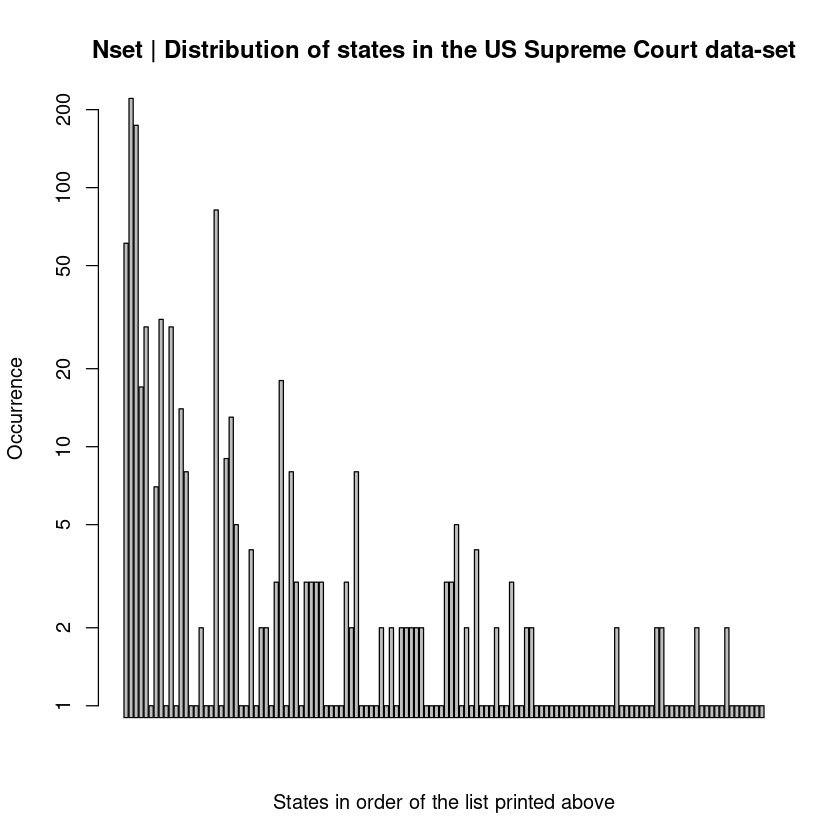

In [18]:
# Small visualization of Nset.
print("All unique states of the data-set in integer representation:", quote=FALSE)
print(Nset[[1]])

barplot(height=Nset[[2]], main="Nset | Distribution of states in the US Supreme Court data-set" , log="y",  
        xlab="States in order of the list printed above", ylab="Occurrence")

 <a id='basis'></a>
### 2.3 Choosing the basis
The next step is to choose a basis. The basis is a list containing integers of the $n$ most biased independent variables in the data-set. Each integer defines a spin operator on which the MCM will be build. By defining the basis the search for the best MCM can be restricted to a subset of models that have the defined basis as a preferred basis. 

The amount of elements the basis contains ($m$) can be less than $n$ (amount of bianry variables in the data-set). This will exclude some spin variables from being modeled at all.

The basis can be defined manually or read from a file with Read_BasisOp_BinaryRepresentation() for a file containing the binary representation of it and with Read_BasisOp_IntegerRepresentation() for a file containing the integer representation of it.
 
To manually define the basis, the basis elements must be written using the integer representation of the spin variable.
For instance, a basis element on the last two spin variable would be written:

      -->  Op = s1 s2           Spin variable
      -->  Op = 000000011       Binary representation
      -->  Op = 3               Integer representation   ( 000000011 = 3 )
      
However for general use and when the basis is unknown, instead the original basis can be used which is generated with the Original_Basis() function which only takes the amount of binary (spin) variables ($n$) in the data-set as input.

In [19]:
print("Choice of the basis for building the Minimally Complex Model (MCM): ", quote = FALSE)

#                                        3 Ways of defining a basis

# 1.Read basis from a file:
# Basis_li <- Read_BasisOp_BinaryRepresentation("INPUT/Dataset_Shapes_n9_Basis_Binary.dat", n)
# Basis_li <- Read_BasisOp_IntegerRepresentation("INPUT/Dataset_Shapes_n9_Basis_Integer.dat")

# 2. Define basis manually.
# Basis_li <- c(3, 5, 9, 48, 65, 129, 272, 81, 1) # Ex. This is the best basis for the "Shapes" dataset


# 3. Use the original basis of the data:
Basis_li <- Original_Basis(n)
str(Basis_li)

# Print info about the Basis:
PrintTerm_Basis(Basis_li, n);


print(paste0("Number of spin variables, n= ", n), quote = FALSE)
print(paste0("Number of basis elements, m= ", length(Basis_li)), quote = FALSE)

[1] Choice of the basis for building the Minimally Complex Model (MCM): 
 num [1:9] 1 2 4 8 16 32 64 128 256
##	 1 	 1 	 000000001
##	 2 	 2 	 000000010
##	 3 	 4 	 000000100
##	 4 	 8 	 000001000
##	 5 	 16 	 000010000
##	 6 	 32 	 000100000
##	 7 	 64 	 001000000
##	 8 	 128 	 010000000
##	 9 	 256 	 100000000
##
[1] Number of spin variables, n= 9
[1] Number of basis elements, m= 9


#### Basis check

In [20]:
if (length(Basis_li) > n) {
  print(" -->  Error: the number 'm' of basis elements is larger than the size 'n' of the system.")
} else {
  print("Passed Basis check; everything seems fine.")
  print("Make sure that the set of basis elements provided are orthogonal to each other.")
}

[1] "Passed Basis check; everything seems fine."
[1] "Make sure that the set of basis elements provided are orthogonal to each other."


 <a id='kset'></a>
### 2.4 Build Kset

If a basis other than the original basis was chosen, Nset needs to be rewritten in the new basis and this is done with the function build_Kset(). If the last parameter of the function is set to TRUE, the function will print the original state in integer and binary representation and next to it the state transformed in the new basis.

It transforms the data in the specified basis.  If the size $m$ (amount of basis elements) of the basis is smaller than the number $n$ of variables, then the data will be troncated to the $m$ first basis elements. 

In case that the original basis, as is done for this analysis on the US Supreme Court data-set, is used Kset will be equal to Nset. 

In [21]:
Kset <- build_Kset(Nset, Basis_li, n, TRUE)

print("Kset contains:", quote=FALSE)
str(Kset)



--->> Build Kset...
383: 	101111111 	383: 	101111111
511: 	111111111 	511: 	111111111
0: 	000000000 	0: 	000000000
356: 	101100100 	356: 	101100100
36: 	000100100 	36: 	000100100
325: 	101000101 	325: 	101000101
375: 	101110111 	375: 	101110111
308: 	100110100 	308: 	100110100
64: 	001000000 	64: 	001000000
292: 	100100100 	292: 	100100100
472: 	111011000 	472: 	111011000
381: 	101111101 	381: 	101111101
4: 	000000100 	4: 	000000100
403: 	110010011 	403: 	110010011
65: 	001000001 	65: 	001000001
288: 	100100000 	288: 	100100000
438: 	110110110 	438: 	110110110
235: 	011101011 	235: 	011101011
372: 	101110100 	372: 	101110100
328: 	101001000 	328: 	101001000
52: 	000110100 	52: 	000110100
382: 	101111110 	382: 	101111110
260: 	100000100 	260: 	100000100
76: 	001001100 	76: 	001001100
300: 	100101100 	300: 	100101100
310: 	100110110 	310: 	100110110
357: 	101100101 	357: 	101100101
311: 	100110111 	311: 	100110111
478: 	111011110 	478: 	111011110
132: 	010000100 	132: 	010000100
129: 	0

 <a id='print'></a>
### 2.5 (OPTIONAL) Analyzing all Independent and Sub-complete Models

[Jump to skip to 2.6](#mcm_search)

With the package it is also possible to print some information about all independent and sub-complete models of the data-set. These can give some indication of the bias of the (spin) variables.

#### Independent Models

Independent models are defined as MCMs in which each variable is in its own independent community. The function PrintInfo_All_Indep_Models() prints the Log-Evidence and Log-Likelihood of all independent models.





At first it starts with a model containing only 1 community consisting of only the first spin variable. Then it keeps adding one more spin variable to the model but defines all of them to be in their own separate community. 

In [22]:
print("Independent models in the new basis:")
PrintInfo_All_Indep_Models(Kset, N, n)

[1] "Independent models in the new basis:"
Add Op = 1 	 LogE = -5582.49 	 LogL = -5578.87
Add Op = 2 	 LogE = -5572.97 	 LogL = -5565.73
Add Op = 4 	 LogE = -5482.52 	 LogL = -5471.65
Add Op = 8 	 LogE = -5474.35 	 LogL = -5459.85
Add Op = 16 	 LogE = -5454.75 	 LogL = -5436.63
Add Op = 32 	 LogE = -5382.6 	 LogL = -5360.85
Add Op = 64 	 LogE = -5366.11 	 LogL = -5340.74
Add Op = 128 	 LogE = -5319.51 	 LogL = -5290.52
Add Op = 256 	 LogE = -5258.1 	 LogL = -5225.48


#### Sub-complete Models
Sub-complete models are defined as MCMs in which each variable is together in one community. The function PrintInfo_All_SubComplete_Models() prints the Log-Evidence and Log-Likelihood of all sub-complete models.


At first it starts with a model containing only 1 community consisting of only the first spin variable. Then it keeps adding one more spin variable to the model and puts them in the same community as all other variables. 

In [23]:
PrintInfo_All_SubComplete_Models(Kset, N, n)

Add Op = 1 	 LogE = -5582.49 	 LogL = -5578.87
Add Op = 2 	 LogE = -5292.12 	 LogL = -5282.39
Add Op = 4 	 LogE = -5134.16 	 LogL = -5114
Add Op = 8 	 LogE = -4763.22 	 LogL = -4725.26
Add Op = 16 	 LogE = -4479.97 	 LogL = -4410.4
Add Op = 32 	 LogE = -4102.76 	 LogL = -3971.96
Add Op = 64 	 LogE = -3824.99 	 LogL = -3585.3
Add Op = 128 	 LogE = -3654.89 	 LogL = -3216.58
Add Op = 256 	 LogE = -3525.33 	 LogL = -2736.96


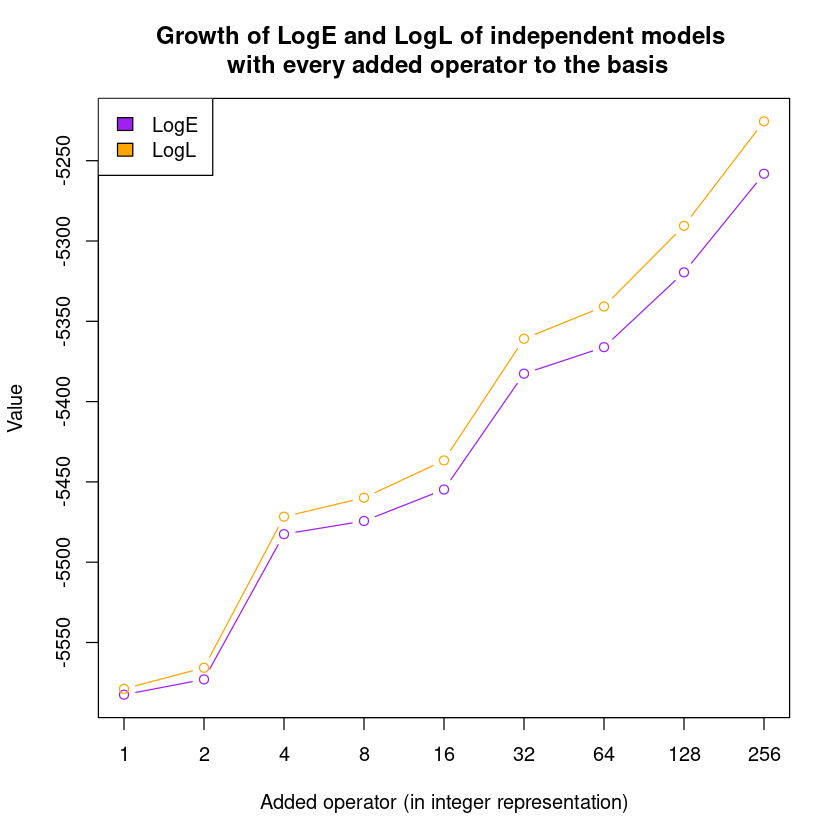

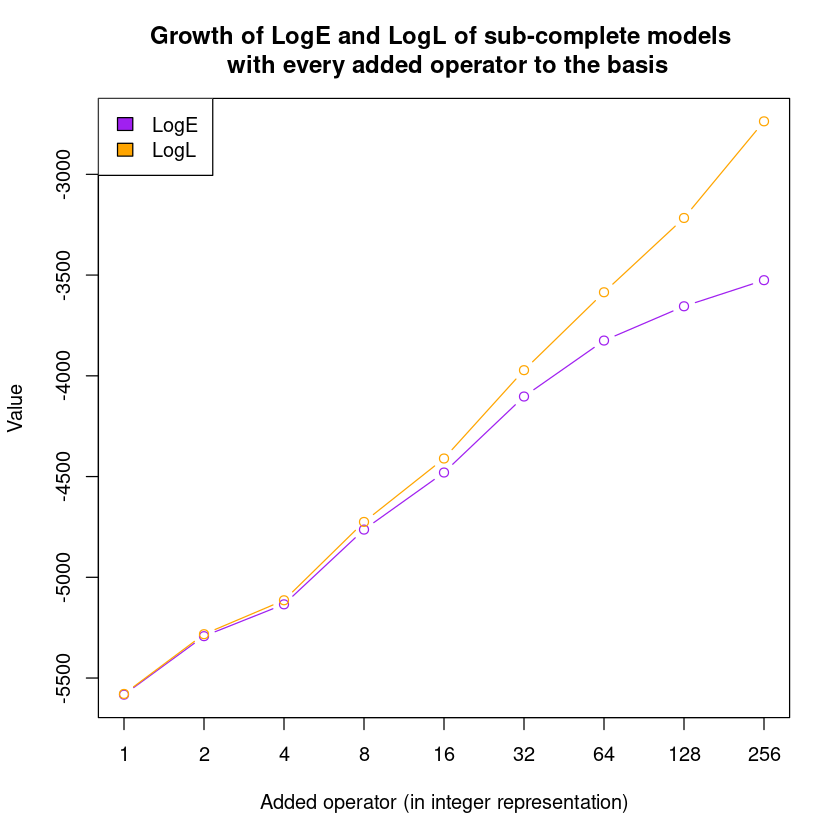

In [24]:
# ################################################################################################# #
# THIS CELL IS NOT PART OF THE PACKAGE BUT MERELY TO VISUALIZE THE DATA FOR A BETTER UNDERSTANDING. #
# ################################################################################################# #


# ##################################### PLOT FOR INDEPENDENT MODELS
results <- capture.output(PrintInfo_All_Indep_Models(Kset, N, n))

# results
Ops <- c()
LogLs <- c()
LogEs <- c()

for (res in results) {
    sections <- strsplit(res, split = "[[:alpha:], [:blank:]]+=", perl=TRUE)
    Ops[length(Ops) + 1] <- as.integer(sections[[1]][2])
    LogEs[length(LogEs) + 1] <- as.numeric(sections[[1]][3])
    LogLs[length(LogLs) + 1] <- as.numeric(sections[[1]][4])
}

x <- 1:n

# png(file = "A_results.png",   # The directory you want to save the file in
#     width = 400, # The width of the plot in inches
#     height = 350) # The height of the plot in inches
plot(x, LogEs,
ylab="Value",
xlab="Added operator (in integer representation)",
xaxt = "n",
type="b",
col="purple",
ylim=range(LogEs, LogLs))
# Second line
lines(x, LogLs, type="b", col="orange")
# X-axis
axis(1, at = x, labels=Ops)
# Rest
title("Growth of LogE and LogL of independent models \n with every added operator to the basis")
legend("topleft", c("LogE","LogL"), fill=c("purple","orange"))
# dev.off()


# ####################################### PLOT FOR SUB-COMPLETE MODELS
results <- capture.output(PrintInfo_All_SubComplete_Models(Kset, N, n))

# results
Ops <- c()
LogLs <- c()
LogEs <- c()

for (res in results) {
    sections <- strsplit(res, split = "[[:alpha:], [:blank:]]+=", perl=TRUE)
    Ops[length(Ops) + 1] <- as.integer(sections[[1]][2])
    LogEs[length(LogEs) + 1] <- as.numeric(sections[[1]][3])
    LogLs[length(LogLs) + 1] <- as.numeric(sections[[1]][4])
}

# png(file = "B_results.png",   # The directory you want to save the file in
#     width = 400, # The width of the plot in inches
#     height = 350) # The height of the plot in inches

x <- 1:n
plot(x, LogEs,
ylab="Value",
xlab="Added operator (in integer representation)",
xaxt = "n",
type="b",
col="purple",
ylim=range(LogEs, LogLs))
# Second line
lines(x, LogLs, type="b", col="orange")
# X-axis
axis(1, at = x, labels=Ops)
# Rest
title("Growth of LogE and LogL of sub-complete models \n with every added operator to the basis")
legend("topleft", c("LogE","LogL"), fill=c("purple","orange"))
# dev.off()

#### Independent Models versus Sub-complete models

As shown in the plots above, SubCMs in which the variables are all part of the same community have a higher Log-evidence and Log-likelihood than Independent models indicating that the variables are not completely independent from each other and some correlation exists.

Therefore it is interesting to search for the best MCM of the data-set and what community structures it describes. More about this in the next section.

 <a id='mcm_search'></a>
### 2.6 Finding the best MCM

There are two ways the exhaustive search for the best MCM can be performed. The first is described in section 2.6.1 and requires cells in section 2.1 to 2.4 to be ran beforehand. The second is described in section 2.6.2 which can be ran independently from the previous sections.



<a id='mcm_search_dependent'></a>
#### 2.6.1 Find best MCM
 <div class="alert alert-block alert-info">
    <b>Note:</b> Before running the cell below make sure to run the cells in section 2.1 to 2.4 beforehand.
    </div>
    
Finally, to find communities in the data-set the function MCM_GivenRank_r() is used. This function performs the exhaustive search for the best MCM for the data-set and returns it as a list containing the integer representation of the MCM partitions.

MCM_GivenRank_r() takes the following input parameters:

| Input variable | Description |
| :- | :---------------------: | 
| $N$ | The total amount of data-points in the data-set (size of entire data-set) | 
| LogE_BestMCM1 | An empty variable that will contain the Log-Evidence of the best MCM after running the function |
| $r$ | The rank. It is the amount of basis operators to restrict the search to  |
| $n$ | The amount of binary (spin) variables  | 
| output_dir | The location and name of output directory. | 
|print | A boolean value indicating to also generate a file containing the Log-evidence of all the MCM of rank r=9| 

The search among all MCMs is based on the $r$ first basis operators (i.e., the models of rank exactly equal to '$r$'). By defining an $r$ that is smaller than $n$ it excludes spin variables $r + 1$ to $n$ from the MCM search meaning that those variables will not be part of any community. 

Conditions on the value of $r: r <= m <= n$.

    'r' must be smaller or equal to the number 'm' of basis element provided, 'm = length(Basis_li)' which must be smaller or equal to the number n of spin variables.

For this analysis all (spin) variables (i.e. the judges) are considered relevant and should be included in the search for community structures. Therefore $r = n$.

In the cell below first the rank is set and the if statement checks if the condition on the value $r$ is respected.
Hereafter MCM_GivenRank_r() is called to find the best MCM and PrintTerminal_MCM_Info is called to print information regarding the best MCM.




In [25]:
r <- n 
LogE_BestMCM1 <- 0 # Variable which will contain the Log-Evidence of the returned MCM.

if (r <= length(Basis_li)) {
  MCM_partition1 <- MCM_GivenRank_r(Kset, N, LogE_BestMCM1, r, n, output_dir, TRUE) #The community detection
    
  PrintTerminal_MCM_Info(Kset, N, n, MCM_partition1)
    
} else {
  print("The condition on the value of 'r' is not respected")
}

--->> Search for the best MCM..

--> Print the LogE-value of all the MCM of rank r=9 in the file 'OUTPUT_9var_USSCourt/AllMCMs_Rank_r=9.dat'

--> Number of MCModels (of rank r=9) that were compared: 21147

********** Best MCM: **********
	 !! The first operator of the basis provided corresponds to the bit the most on the right !!
	 !! The last operator corresponds to the bit the most on the left !!

	 >> Best Model = 010001011	 	 LogE = -3300.97

********** General Information about the MCM: **********
Best MCM has 2 partitions and the following properties:
	 LogL = -3194.36
 	 C_param = 114.056 	 	 C_geom = -8.95092
 	 Total complexity = 105.105
 	 MDL = -3299.46
  	 LogE = -3300.97

********** Information about each part of the MCM: **********
	 (the total LogE of the model is the sum of the values for each part)
	 !! The first operator of the basis provided corresponds to the bit the most on the right !!
	 !! The last operator corresponds to the bit the most on the left !!

## 1:Par

In [26]:
LogE_BestMCM1

[1] -3300.968

#### Results explanation

The exhaustive search for the best MCM on the US Supreme Court data-set resulted in an MCM that contains two paritions of 4 and 5 variables respectively. 

The partitions describe the following community structures:

| Partition (Integer representation)  | WR | JS | SO | AS | AK | DS | CT | RG | SB |
| :- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 139 | 0 | 1 | 0 | 0 | 0 | 1 | 0 | 1 | 1 |
| 372 | 1 | 0 | 1 | 1 | 1 | 0 | 1 | 0 | 0 |

Partition 139 (= '010001011') defines a community of the judges JS, DS, RG and SB. 

Partition 372 (= '101110100') is a communtiy of the judges WR, SO, AS, AK, and CT. 

And these communities actually align with the judges political orientation as was described in the paper called Statistical Inference of Minimally Complex Models (2021) by Clélia de Mulatier, Paolo P. Mazza, and Matteo Marsili !

 <a id='mcm_search_aao'></a>
#### 2.6.2 Find best MCM (all previous steps combined)

It is also possible to do the community detection at once with the function MCM_search(). This function does the same as section 2.2 - 2.6.1. This function assumes that $r$ = $n$ and therefore the basis must contain $m$ = $n$ variables to uphold the previously stated condition on the rank $r$. 

MCM_search() takes as input parameters:

| Input variable | Description |
| :- | :---------------------: | 
| $n$ | The amount of binary (spin) variables  | 
| datafile_name | The path to and name of the input data-file  |
| basis | The basis on which to build the MCM on  |
| output_dir | The path to and name of the output directory which will be created to store the results in |
| Additional search | Boolean indicating whether to perform additional MCM searches (2 versions) that include MCM's containing less than $n$ variables. For more information consult the package manual. Setting this to TRUE will significantly increase the program's execution time |

By default all additional prints are turned off. 

In [27]:
n <- 9 # Amount of binary spin variables per data-point
datafile_name <- 'data/US_SupremeCourt/SCOTUS_n9_N895_OldBasis.dat'
basis <- Original_Basis(n)
output_dir <- 'OUTPUT_9var_USSCourt'

MCM_search(n, datafile_name, basis, output_dir, FALSE)

--->> Create OUTPUT Folder: (if needed) 

*******************************************************************************************
***********************************  Read the data:  **************************************
*******************************************************************************************

--->> Read "data/US_SupremeCourt/SCOTUS_n9_N895_OldBasis.dat",	 Build Nset...		 data size N = 895

*******************************************************************************************
******************************  Choice of the basis:  *************************************
*******************************************************************************************

Choice of the basis for building the Minimally Complex Model (MCM):
##	 1 	 1 	 000000001
##	 2 	 2 	 000000010
##	 3 	 4 	 000000100
##	 4 	 8 	 000001000
##	 5 	 16 	 000010000
##	 6 	 32 	 000100000
##	 7 	 64 	 001000000
##	 8 	 128 	 010000000
##	 9 	 256 	 100000000
##
Number of spin variables, n=9

[1] 0

[Jump to the start](#start)



<a id='sa_start'></a>
## 3. Analyis of the Big5 Personality test
 
The data-set that will be used in this analysis is that of the Big5 personality test. The Big5 personality test is a test containing 50 questions that investigates the personality of individuals based on 5 traits:
1. Extraversion
2. Neuroticism
3. Agreeableness
4. Conscientiousness
5. Openness to experience


The data-set contains 1012558 data-points which are samples taken from https://openpsychometrics.org/_rawdata/IPIP-FFM-data-8Nov2018.zip. 

This data-set was already analyzed in the original paper of this program but there it was done using the greedy search based implementation of the algorithm. Inference on the class of MCMs revealed whether the data confirms the hypothesis that these questions probe the respondent’s personality along five dimensions and how these dimensions are associated with the questions of the test. That analysis showed community structures with the 50 questions that subdivided them into 5 communities containing 10 questions which aligned with the 5 traits.


The aim is to revisit this analysis.

#### More about the Big5 Personality test data-set
The Big5 dataset consists of 50 binary (spin) variables per data-point ($N$ = 1013558). It was therefore first cut down to a set containing 12 variables. Of these 12 variables there were 6 questions per trait added. The analyzed traits are Agreeableness and Conscientioussness. 



<a id='sa_set'></a>
### 3.1 Analysis results on a subset of the Big5 data-set

When running the community detection on the following questions:

AGREEABLENESS 2
- AGR1	I feel little concern for others.
- AGR2	I am interested in people.
- AGR4	I sympathize with others' feelings.
- AGR5	I am not interested in other people's problems.
- AGR6	I have a soft heart.
- AGR7	I am not really interested in others.

CONSCIENTIOUSNESS 3
- CSN2	I leave my belongings around.
- CSN5	I get chores done right away.
- CSN6	I often forget to put things back in their proper place.
- CSN7	I like order.
- CSN8	I shirk my duties.
- CSN9	I follow a schedule.


This result was obtained:

| Partition | LogE |
| :----- | :--: | 
| 000000000000 | -5.78313e+06 |

This means that it failed to distinguish that the questions belonged to two different traits. 

In [28]:
datafile_name <- 'data/Big5/slice/big5_12vars_21_22_24_25_26_27_32_35_36_37_38_39.dat'
n <- 12
Basis_li <- Original_Basis(n)
OUTPUT_dir <- paste0("OUTPUT_", datafile_name)

# It takes about an hour to run so the function call is commented.
# MCM_search(n, datafile_name, Basis_li, OUTPUT_dir, FALSE)

<a id='inspect_loge'></a>
### 3.2 Inspecting Log-evidence 

Given the previous results, it is interesting to analyze the change in log-evidence and see how many questions per trait are needed in order for the model separating the communities to be better than the one in which they are all together in one community.

To do so, the difference in log-evidence between the two MCMs is calculated. The difference in log-evidence is calculated by subtracting the log-evidence of the MCM in which every variable belongs to one community from the log-evidence of the MCM in which the variables belong in their own communities corresponding to their trait. 

This difference is negative if the the MCM with one community is better than the MCM with separate communities. Once the MCM with separate communities is better, this difference becomes positive. 


In [29]:
# Given an MCM corresponding to the given input data-file, the LogE is calculated and returned.
create_MCM_get_LogE <- function(df_name, n, MCM_Choice) {
    basis <- Original_Basis(n)
    MCM_Partition0 <- Create_MCM(MCM_Choice)

    N <- 0L
    Nset <- read_datafile(N, n, df_name)

    Kset <- build_Kset(Nset, basis, n, FALSE)
    if(check_partition(MCM_Partition0, n))
    {
        return (LogE_MCM(Kset, MCM_Partition0, N, n, FALSE))
    } else {
        print("The set of 'parts' provided does not form a partition of the basis elements.")
        return(NULL)
    }
}

# MCM_SC_comparison_setup, SC=SplitCommunities. 
# Returns list containing the vector of the LogE of an MCM in which every variable is in one community
# and the vector containing the LogE of an MCM in which they are in equally sized separate communities!
MCM_SC_comparison_setup <- function(MCMs, d, parts, t_n, traits) {
    OC <- MCMs[[1]]
    SC <- MCMs[[2]]
    
    # Everything in 1 community   
    MCM_Choice <- c()
    c_part <- strtoi(parts[[traits+1]], base = 2)
    MCM_Choice <- c(MCM_Choice, c_part)
    OC[length(OC) + 1] <- create_MCM_get_LogE(d, t_n, MCM_Choice)
    names(OC)[length(OC)] <- toString(length(OC) + 3)
    
    # Separate communities
    MCM_Choice0 <- c() 
    for (i in 1:traits) {
        c_part <- strtoi(parts[[i]], base = 2)
        MCM_Choice0 <- c(MCM_Choice0, c_part)
    }
    SC[length(SC) + 1] <- create_MCM_get_LogE(d, t_n, MCM_Choice0)
    names(SC)[length(SC)] <- toString(length(OC) + 3)
    
    
    return (list(OC, SC))
}

#### LogE analysis of 2 traits 

The two traits making up a total of 20 variables with corresponding questions that were analyzed are:

AGREEABLENESS 2
- AGR1	I feel little concern for others.
- AGR2	I am interested in people.
- AGR3	I insult people.
- AGR4	I sympathize with others' feelings.
- AGR5	I am not interested in other people's problems.
- AGR6	I have a soft heart.
- AGR7	I am not really interested in others.
- AGR8	I take time out for others.
- AGR9	I feel others' emotions.
- AGR10	I make people feel at ease.

CONSCIENTIOUSNESS 3
- CSN1	I am always prepared.
- CSN2	I leave my belongings around.
- CSN3	I pay attention to details.
- CSN4	I make a mess of things.
- CSN5	I get chores done right away.
- CSN6	I often forget to put things back in their proper place.
- CSN7	I like order.
- CSN8	I shirk my duties.
- CSN9	I follow a schedule.
- CSN10	I am exacting in my work.


In [30]:
# Starting with 4 questions per trait
# vector(mode = "numeric", length = 7), vector(mode = "numeric", length = 7)
MCMs <- c()

traits <- 2
# #################################### 2 traits 8 variables ######################################
df <- c("data/Big5/slice/big5_8vars_24-27_35-38.dat")
partitions <- c("11110000", "00001111", "11111111")
total_n <- 8

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
#################################### 2 traits 10 variables ######################################
df <- c('data/Big5/slice/big5_10vars_22_24-27_32_35-38.dat')
partitions <- c("1111100000", "0000011111", "1111111111")
total_n <- 10

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 2 traits 12 variables ######################################
df <- c('data/Big5/slice/big5_12vars_21_22_24-27_32_35-39.dat')
partitions <- c("111111000000", "000000111111", "111111111111")
total_n <- 12

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 2 traits 14 variables ######################################
df <- c('data/Big5/slice/big5_14vars_21_22-27_32_34-39.dat')
partitions <- c("11111110000000", "00000001111111", "11111111111111")
total_n <- 14

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 2 traits 16 variables ######################################
df <- c('data/Big5/slice/big5_16vars_21-28_32-39.dat')
partitions <- c("1111111100000000", "0000000011111111", "1111111111111111")
total_n <- 16

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 2 traits 18 variables ######################################
df <- c('data/Big5/slice/big5_18vars_21-29_31-39.dat')
partitions <- c("111111111000000000", "000000000111111111", "111111111111111111")
total_n <- 18

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 2 traits 20 variables ######################################
df <- c('data/Big5/slice/big5_20vars_20-29_30-39.dat')
partitions <- c("11111111110000000000", "00000000001111111111", "11111111111111111111")
total_n <- 20

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
###################################################################################################
OneCommunity_2T <- MCMs[[1]]
SeparateCommunity_2T <- MCMs[[2]]

OneCommunity_2T
SeparateCommunity_2T 


--->> Read "data/Big5/slice/big5_8vars_24-27_35-38.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_8vars_24-27_35-38.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_10vars_22_24-27_32_35-38.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_10vars_22_24-27_32_35-38.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_12vars_21_22_24-27_32_35-39.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_12vars_21_22_24-27_32_35-39.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_14vars_21_22-27_32_34-39.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_14vars_21_22-27_32_34-39.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...



4         5         6         7         8         9        10 
 -3904602  -4772765  -5783135  -6749356  -7466955  -8711945 -10776627

4        5        6        7        8        9       10 
-3921024 -4793816 -5813510 -6782063 -7428734 -8403084 -9711163

In [31]:
LogEs2Traits <- data.frame(OneCommunity_2T, SeparateCommunity_2T, row.names=names(OneCommunity_2T))
LogEs2Traits$Difference <- (LogEs2Traits$SeparateCommunity - LogEs2Traits$OneCommunity)
LogEs2Traits

# library(gridExtra)
# png("2TRAITSTABLE.png", height=23*nrow(LogEs2Traits), width=140*ncol(LogEs2Traits))
# p<-tableGrob(LogEs2Traits)
# grid.arrange(p)
# dev.off()

,OneCommunity_2T,SeparateCommunity_2T,Difference
,<dbl>,<dbl>,<dbl>
4,-3904602,-3921024,-16421.26
5,-4772765,-4793816,-21051.57
6,-5783135,-5813510,-30375.20
7,-6749356,-6782063,-32707.21
8,-7466955,-7428734,38220.06
9,-8711945,-8403084,308860.51
10,-10776627,-9711163,1065464.27


#### LogE analysis of 3 traits 

Here the following 3 traits were analyzed making up a total of 30 variables:

EMOTIONAL STABILITY 1
- EST1	I get stressed out easily.
- EST2	I am relaxed most of the time.
- EST3	I worry about things.
- EST4	I seldom feel blue.
- EST5	I am easily disturbed.
- EST6	I get upset easily.
- EST7	I change my mood a lot.
- EST8	I have frequent mood swings.
- EST9	I get irritated easily.
- EST10	I often feel blue.

AGREEABLENESS 2
- AGR1	I feel little concern for others.
- AGR2	I am interested in people.
- AGR3	I insult people.
- AGR4	I sympathize with others' feelings.
- AGR5	I am not interested in other people's problems.
- AGR6	I have a soft heart.
- AGR7	I am not really interested in others.
- AGR8	I take time out for others.
- AGR9	I feel others' emotions.
- AGR10	I make people feel at ease.

CONSCIENTIOUSNESS 3
- CSN1	I am always prepared.
- CSN2	I leave my belongings around.
- CSN3	I pay attention to details.
- CSN4	I make a mess of things.
- CSN5	I get chores done right away.
- CSN6	I often forget to put things back in their proper place.
- CSN7	I like order.
- CSN8	I shirk my duties.
- CSN9	I follow a schedule.
- CSN10	I am exacting in my work.



In [32]:
MCMs <- c()
traits <- 3
# Starting with 4 questions per trait
# #################################### 3 traits 12 variables ######################################
df <- c("data/Big5/slice/big5_3_12vars_10-13_20-23_30-33.dat")
partitions <- c("111100000000", "000011110000", "000000001111", 
                "111111111111")
total_n <- 12

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
#################################### 3 traits 15 variables ######################################
df <- c('data/Big5/slice/big5_3_15vars_10-14_20-24_30-34.dat')
partitions <- c("111110000000000", "000001111100000", "000000000011111", 
                "111111111111111")
total_n <- 15

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 3 traits 18 variables ######################################
df <- c('data/Big5/slice/big5_3_18vars_10-15_20-25_30-35.dat')
partitions <- c("111111000000000000", "000000111111000000", "000000000000111111", 
                "111111111111111111")
total_n <- 18

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 3 traits 21 variables ######################################
df <- c('data/Big5/slice/big5_3_21vars_10-16_20-26_30-36.dat')
partitions <- c("111111100000000000000", "000000011111110000000", "000000000000001111111",
                "111111111111111111111")
total_n <- 21

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 3 traits 24 variables ######################################
df <- c('data/Big5/slice/big5_3_24vars_10-17_20-27_30-37.dat')
partitions <- c("111111110000000000000000", "000000001111111100000000", "000000000000000011111111",
                "111111111111111111111")
total_n <- 24

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 3 traits 27 variables ######################################
df <- c('data/Big5/slice/big5_3_27vars_10-18_20-28_30-38.dat')
partitions <- c("111111111000000000000000000", "000000000111111111000000000", "000000000000000000111111111",
                "111111111111111111111111")
total_n <- 27

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
# #################################### 3 traits 30 variables ######################################
df <- c('data/Big5/slice/big5_3_30vars_10-19_20-29_30-39.dat')
partitions <- c("111111111100000000000000000000", "000000000011111111110000000000", "000000000000000000001111111111",
                "111111111111111111111111111")
total_n <- 30

MCMs <- MCM_SC_comparison_setup(MCMs, df, partitions, total_n, traits)
###################################################################################################
OneCommunity_3T <- MCMs[[1]]
SeparateCommunity_3T <- MCMs[[2]]

OneCommunity_3T
SeparateCommunity_3T 


--->> Read "data/Big5/slice/big5_3_12vars_10-13_20-23_30-33.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_12vars_10-13_20-23_30-33.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_15vars_10-14_20-24_30-34.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_15vars_10-14_20-24_30-34.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_18vars_10-15_20-25_30-35.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_18vars_10-15_20-25_30-35.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_21vars_10-16_20-26_30-36.dat",	 Build Nset...		 data size N = 1013558

--->> Build Kset...


--->> Read "data/Big5/slice/big5_3_21vars_10-16_20-26_30-36.dat",	 Build Nset...		 data size N = 101355

4         5         6         7         8         9        10 
 -6243051  -7591963  -9507771 -12738206 -14497145 -25584658 -95640093

4         5         6         7         8         9        10 
 -6397688  -7764989  -9384186 -10894685 -12098388 -13526014 -15079050

In [33]:
LogEs3Traits <- data.frame(OneCommunity_3T, SeparateCommunity_3T, row.names=names(OneCommunity_3T))
LogEs3Traits$Difference <- (LogEs3Traits$SeparateCommunity_3T - LogEs3Traits$OneCommunity_3T)
LogEs3Traits

# png("3TRAITSTABLE.png", height=23*nrow(LogEs3Traits), width=140*ncol(LogEs3Traits))
# p<-tableGrob(LogEs3Traits)
# grid.arrange(p)
# dev.off()


,OneCommunity_3T,SeparateCommunity_3T,Difference
,<dbl>,<dbl>,<dbl>
4,-6243051,-6397688,-154637.1
5,-7591963,-7764989,-173026.1
6,-9507771,-9384186,123584.5
7,-12738206,-10894685,1843520.9
8,-14497145,-12098388,2398757.2
9,-25584658,-13526014,12058644.3
10,-95640093,-15079050,80561043.0


### LogE Comparison results

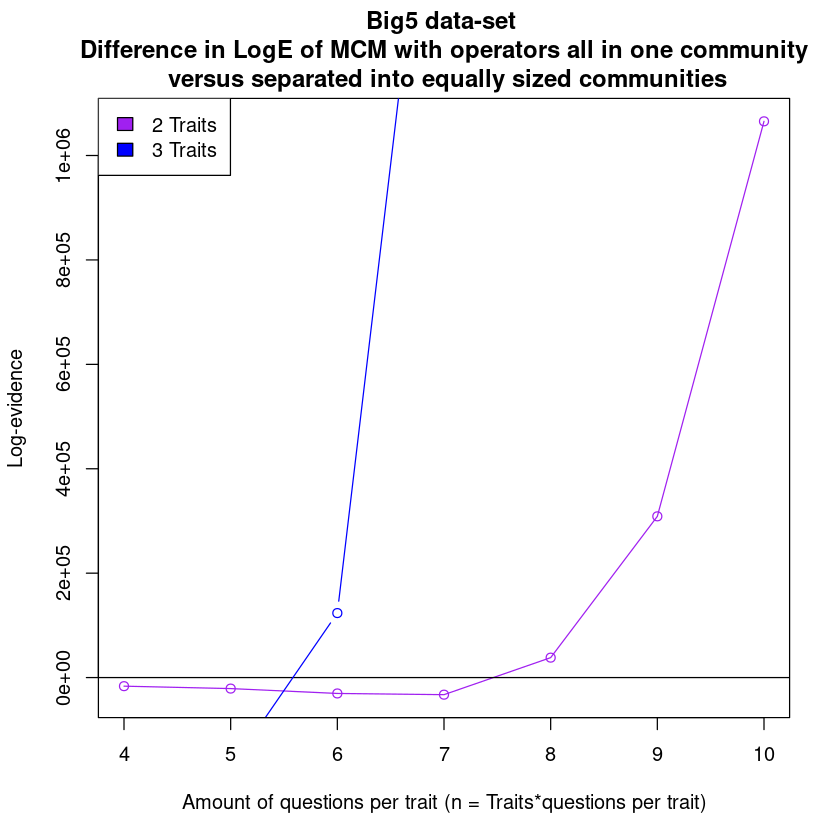

In [34]:
x <- 1:7 
# png(file = "LogE_difference.png",   # The directory you want to save the file in
#     width = 800, # The width of the plot in inches
#     height = 500) # The height of the plot in inches

plot(x, LogEs2Traits$Difference,
    type = "o",
    ylab="Log-evidence",
    xlab="Amount of questions per trait (n = Traits*questions per trait)",
    xaxt = "n",
#     log="y",
    col="purple")
abline(h=0, col="black")
# axis(side=2, at = 1*10^(-10:6),label=c(format(1 * 10^(-10:6), scientific=F) ), las=2 )
lines(x, LogEs3Traits$Difference, type="b", col="blue")

# Rest
Traits <- c("4", "5", "6", "7", "8", "9","10")
# X-axis
axis(1, at = x, labels=Traits)
# Rest
title("Big5 data-set \n Difference in LogE of MCM with operators all in one community \n versus separated into equally sized communities")
legend("topleft", c("2 Traits", "3 Traits"), fill=c("purple" , "blue"))
# dev.off()

### Conclusion

The graph above shows that for the data-set containing questions of 2 traits (total of 20 questions) at least 8 questions per trait are needed in order for the MCM separating them into 2 different partitions to be better than the one in which they are all in one partition. When a set of traits is added to the 2 traits making the total amount of analyzed questions 30, this amount becomes even lower. With 3 traits, the added questions per trait at which the difference becomes positive is 6. 

[Jump to the start](#start)